In [115]:
!pip install mxnet-cu101mkl

In [0]:
import mxnet as mx
from mxnet.gluon import nn
from mxnet import autograd

In [0]:
num_test = 100
num_train = 100
max_degree = 20
true_weights = mx.nd.zeros((max_degree))
true_weights[0:4] = [5, 1.2, -3.4, 5.6]

features = mx.nd.random.normal(0, 0.1, ((num_test + num_train), 1))
poly_features = mx.nd.power(features, mx.nd.arange(0, max_degree).reshape(1, -1))
poly_features = poly_features / (
    mx.nd.gamma(mx.nd.arange(max_degree) + 1).reshape(1, -1))
labels = mx.nd.dot(poly_features, true_weights)
labels += mx.nd.random.normal(0, 0.1, labels.shape)




In [0]:
a = [0]*2

In [119]:
a

[0, 0]

In [0]:
a = [x + y for x, y in zip(a, [1,2])]

In [0]:
class Accumulator():

  def __init__(self, size):

    self.n = size

    self.data = [0] * self.n

  def add(self, *args):

    self.data = [x + y for x,y in zip(self.data, args)]

  def reset(self):
    self.data = [0] * self.n

  def __getitem__(self, i):

    if type(self.data[i]) == int:
      return self.data[i]

    return self.data[i].astype(float)[0]

In [0]:
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt

class Animator:

  def __init__(self , x, y, title, labels, range, figsize, xlabel, ylabel ):

    self.x = x
    self.y = y
    self.title = title
    self.labels = labels
    self.xlabel = xlabel
    self.ylabel = ylabel
    self.range = range
    self.figsize = figsize



  def add_to_plot(self, x, y):

    """
    x : list of data points you want to add to x axis dimension : n
    y: list of lists where each list has a dimension n (n is the number of individual line plots)
    """
    # print("Hi")
    self.x = self.x + x
    for i, yi in enumerate(self.y):
      yi[:] = yi + y[i]
    

  

    sns.set_style("darkgrid")

    for i,j in enumerate(self.y):
      print(j)
      plt.legend().remove()
      plt.plot(self.x,j, label = self.labels[i])
    plt.legend()
    plt.title(self.title)
    plt.xlabel(self.xlabel)
    plt.ylabel(self.ylabel)

    
    display.clear_output(wait=True)
    plt.show()


    display.display(plt)
    

In [0]:
def evaluate_loss(net, data_iter1, loss):

  metric1  = Accumulator(2)

  for X,y in data_iter1:

    metric1.add(loss(net(X), y).sum(), y.size)
  # print(metric1[0]/metric1[1])
  return metric1[0]/metric1[1]

    

In [0]:
  def data_iter(batch_size, features, labels):

    """
    batch_size:  min batch size

    features: X matrix

    labels: y

    returns: X,y pairs  in mini batches 
    """

    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # shuffle indices to pick randomly for each batch
    batch_indcies = mx.nd.array([])


    #  create batches of batch_size  
    for i in range(0, num_examples, batch_size):

      batch_indices = mx.nd.array( indices[i: min(i+batch_size, num_examples)])

      yield features[batch_indices], labels[batch_indices]

In [0]:
def train(train_features, test_features, train_labels, test_labels, num_epochs = 1000):


  net = nn.Sequential()
  net.add(nn.Dense(1, use_bias=False))
  net.initialize()
  loss = mx.gluon.loss.L2Loss()
  batch_size = min(10, train_labels.shape[0])
  train_iter = list(data_iter(batch_size, train_features, train_labels))
  test_iter = list(data_iter(batch_size,test_features, test_labels))

  trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

  animator = Animator([],[[],[]], "Performance metrics", ["train loss", "test loss"], (3,4), (3,4), "epoch", "value")
  
  loss_epoch = []
  for epoch in range(1, num_epochs+1):
    loss_epoch.append(train_epoch_ch3(net, train_iter, loss, trainer))

    if epoch % 50 == 0:
              
        animator.add_to_plot([epoch], [[evaluate_loss(net, train_iter, loss).asnumpy()[0]],
                            [evaluate_loss(net, test_iter, loss).asnumpy()[0]]])
  print('weight:', net[0].weight.data().asnumpy())


In [0]:
from IPython.core.debugger import set_trace
def train_epoch_ch3(net, train_iter1, loss, updater):

    
    metric = Accumulator(2)
    
      # train_loss_sum, train_acc_sum, num_examples
    if isinstance(updater, gluon.Trainer):
        updater = updater.step
    count = 0

    for X, y in train_iter1:
  
        count = count+1
        # Compute gradients and update parameters
        with autograd.record():
            y_hat = net(X)
            l = loss(y_hat, y)
        l.backward()
        updater(X.shape[0])
        
        metric.add(l.sum()[0].asnumpy(), y.size)
        
    # Return training loss and training accuracy
    #set_trace()

    temp = metric[0] / metric[1]

    metric.reset()

    return temp




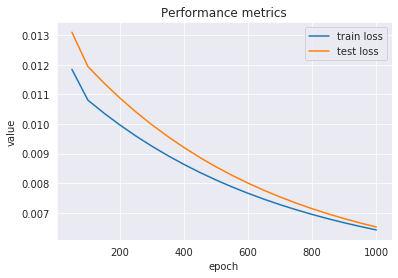

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

weight: [[ 4.9913235   0.7049002  -0.03069093  0.05178758]]


In [133]:
from mxnet import gluon
import random
train(poly_features[:num_train, 0:4], poly_features[num_train:, 0:4],
      labels[:num_train], labels[num_train:], 1000)

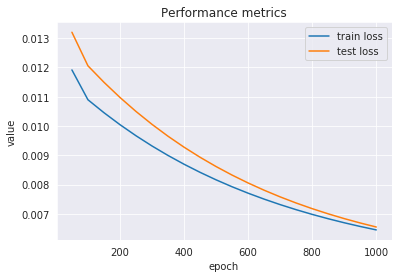

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

weight: [[4.991713   0.70054203]]


In [131]:
train(poly_features[:num_train, 0:2], poly_features[num_train:, 0:2],
      labels[:num_train], labels[num_train:], 1000)

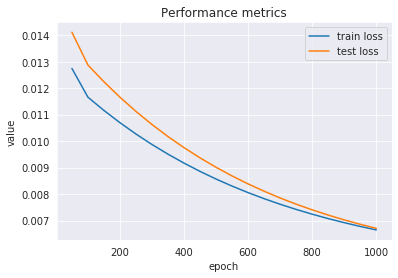

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

weight: [[ 4.991715    0.6728044   0.00586065  0.04905009  0.05981563  0.03066232
   0.05136054 -0.02472883  0.04426111  0.02445559  0.05760313  0.02424668
  -0.0313128   0.04232981 -0.0182667  -0.06999152 -0.01681485  0.02060939
   0.00846308  0.02420449]]


In [135]:
n_subset = 100  # Subset of data to train on
n_degree = 20  # Degree of polynomials
n_train = n_test = 100
train(poly_features[1:n_subset, 0:n_degree],
      poly_features[n_train:, 0:n_degree], labels[1:n_subset],
      labels[n_train:])